In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1337)

In [2]:
dataset = "./data/mushrooms.csv"

data = pd.read_csv(dataset)  # read DataSet

print("DataSet Size : {}".format(data.shape))
data.head(5)  # top 5 contents

DataSet Size : (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
p = data.loc[data['class'] == 'p']
e = data.loc[data['class'] == 'e']

print("poison : {} edible : {}".format(len(p), len(e)))

poison : 3916 edible : 4208


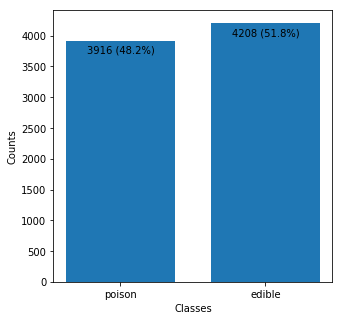

In [4]:
def draw_bar(p, e, name):
    classes = ['poison', 'edible']
    counts = [len(p), len(e)]

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)

    rects = plt.bar(np.arange(2), counts, align='center', width=.75)
    plt.xticks(np.arange(2), classes)

    for i, rect in enumerate(rects):
        ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(counts[i]) + " ({:.1f}%)".format(counts[i] / 8124 * 100), ha='center')

    plt.xlabel(name)
    plt.ylabel('Counts')

draw_bar(p, e, "Classes")

In [5]:
res = data.isin(['?']).any()
res.loc[res == True]

stalk-root    True
dtype: bool

In [6]:
print(len(data.loc[data['stalk-root'] == '?']))
data.drop('stalk-root', axis=1, inplace=True)  # drop stalk-shape

2480


In [7]:
n = 5
top_p = p.sample(n)
top_e = e.sample(n)

In [8]:
top_p

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4487,p,x,y,g,f,f,f,c,b,p,...,k,p,p,p,w,o,l,h,v,d
5575,p,x,s,b,t,f,f,c,b,h,...,s,w,w,p,w,o,p,h,v,g
6462,p,f,y,e,f,s,f,c,n,b,...,k,w,p,p,w,o,e,w,v,p
7065,p,x,y,n,f,m,a,c,b,w,...,y,c,c,p,w,n,n,w,c,d
5981,p,f,s,w,t,f,f,c,b,w,...,s,w,w,p,w,o,p,h,s,u


In [9]:
top_e

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2523,e,x,y,n,t,n,f,c,b,n,...,s,g,w,p,w,o,p,k,y,d
7744,e,k,f,w,f,n,f,w,b,w,...,s,w,w,p,w,t,p,w,n,g
1849,e,x,f,n,t,n,f,c,b,w,...,s,g,w,p,w,o,p,k,v,d
3517,e,f,y,n,t,n,f,c,b,u,...,s,g,w,p,w,o,p,k,y,d
3260,e,f,y,g,t,n,f,c,b,p,...,s,g,p,p,w,o,p,k,y,d


In [10]:
def pd_to_docx(df, name):
    import docx
    
    doc = docx.Document()

    t = doc.add_table(df.shape[0] + 1, df.shape[1])

    for j in range(df.shape[-1]):
        t.cell(0, j).text = df.columns[j]

    for i in range(df.shape[0]):
        for j in range(df.shape[-1]):
            t.cell(i + 1, j).text = str(df.values[i,j])

    doc.save(name)

# pd_to_docx(top_e, './top-%d-edible-table.docx' % n)
# pd_to_docx(top_p, './top-%d-poison-table.docx' % n)

In [11]:
for c in data.columns[1:]:
    print("Column : %s" % c)
    keys = data[c].unique()
    for k in keys:
        d = pd.concat([data['class'], data[c]], axis=1)
        e = d.loc[(d['class'] == 'e') & (data[c] == k)]
        p = d.loc[(d['class'] == 'p') & (data[c] == k)]
        e_len, p_len = len(e), len(p)
        total = e_len + p_len
        print("[*] key %s : %d/%d (%.3f/%.3f) (total %d)" % 
              (k, e_len, p_len, (e_len/total), (p_len/total), total))

Column : cap-shape
[*] key x : 1948/1708 (0.533/0.467) (total 3656)
[*] key b : 404/48 (0.894/0.106) (total 452)
[*] key s : 32/0 (1.000/0.000) (total 32)
[*] key f : 1596/1556 (0.506/0.494) (total 3152)
[*] key k : 228/600 (0.275/0.725) (total 828)
[*] key c : 0/4 (0.000/1.000) (total 4)
Column : cap-surface
[*] key s : 1144/1412 (0.448/0.552) (total 2556)
[*] key y : 1504/1740 (0.464/0.536) (total 3244)
[*] key f : 1560/760 (0.672/0.328) (total 2320)
[*] key g : 0/4 (0.000/1.000) (total 4)
Column : cap-color
[*] key n : 1264/1020 (0.553/0.447) (total 2284)
[*] key y : 400/672 (0.373/0.627) (total 1072)
[*] key w : 720/320 (0.692/0.308) (total 1040)
[*] key g : 1032/808 (0.561/0.439) (total 1840)
[*] key e : 624/876 (0.416/0.584) (total 1500)
[*] key p : 56/88 (0.389/0.611) (total 144)
[*] key b : 48/120 (0.286/0.714) (total 168)
[*] key u : 16/0 (1.000/0.000) (total 16)
[*] key c : 32/12 (0.727/0.273) (total 44)
[*] key r : 16/0 (1.000/0.000) (total 16)
Column : bruises
[*] key t : 2

In [12]:
# Data Labeling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

"""
for c in data.columns[1:]:
    le = LabelEncoder()
    data[c] = le.fit_transform(data[c])

    ohe = OneHotEncoder()
    tmp = ohe.fit_transform(data[c])
    
    print(c, tmp)
"""

le = LabelEncoder()  # robust way
for i in data.columns:
    data[i] = le.fit_transform(data[i])

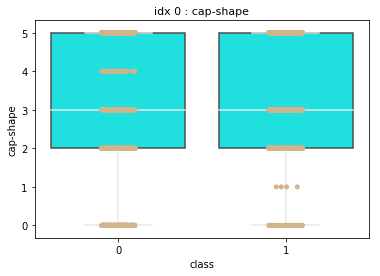

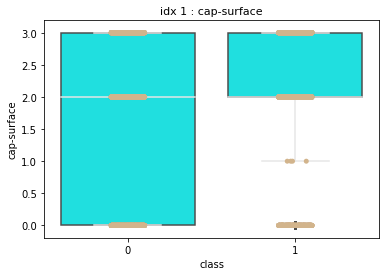

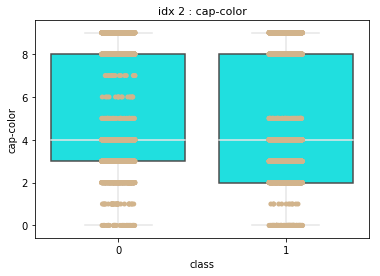

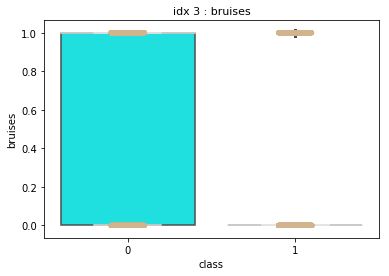

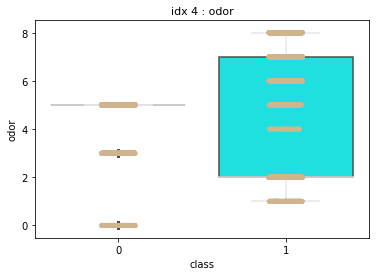

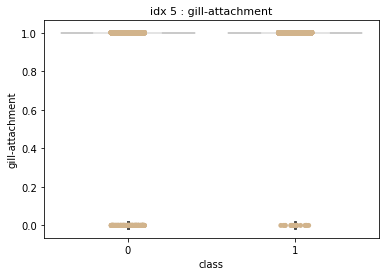

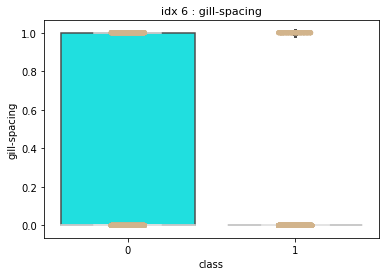

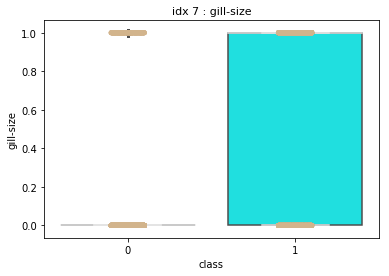

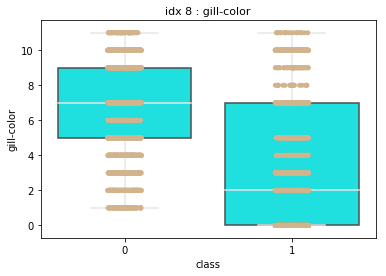

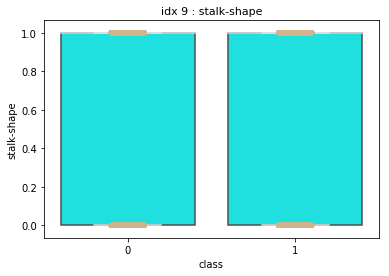

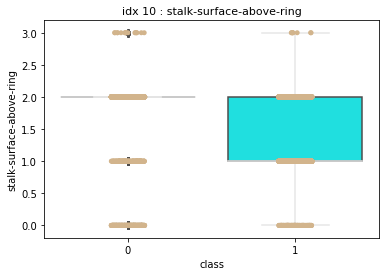

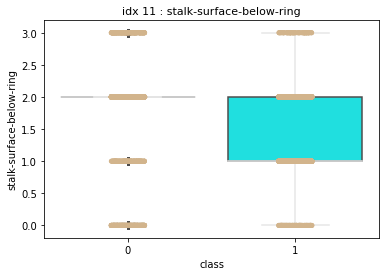

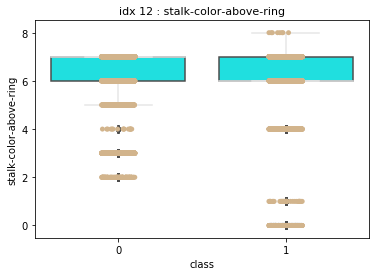

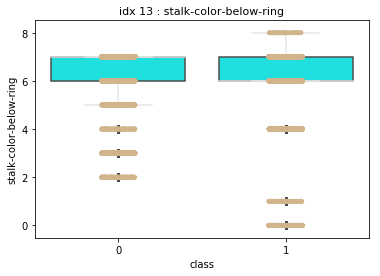

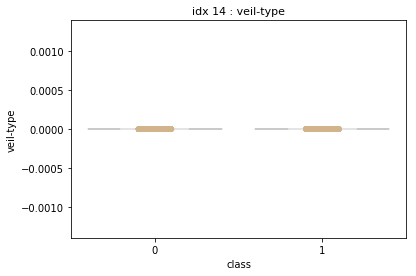

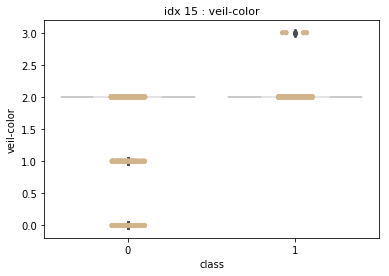

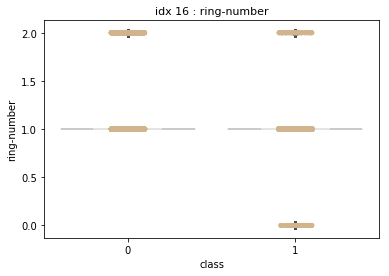

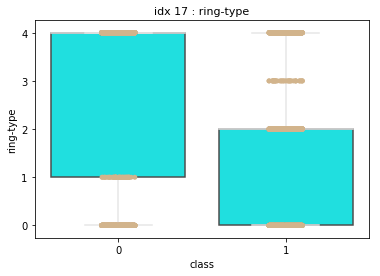

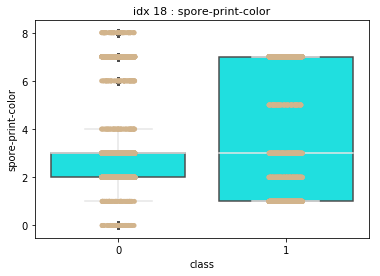

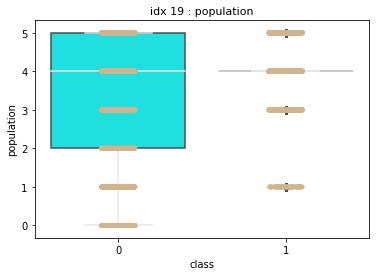

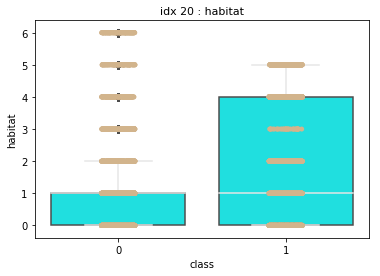

In [13]:
import seaborn as sns
import os


if not os.path.exists('./box_plot/'):
    os.mkdir('./box_plot/')

def boxplot(name="", title=""):
    global data

    ax = sns.boxplot(x="class", y=name, data=data, color='cyan')
    plt.setp(ax.lines, color=".1")
    
    ax = sns.stripplot(x="class", y=name, data=data, jitter=True,
                       color='tan', edgecolor='red')
    plt.setp(ax.lines, color=".9")
    
    plt.savefig('./box_plot/%s' % name)
    plt.title(title, fontsize=11)
    plt.show()


for idx, col in enumerate(data.columns[1:]):
    boxplot(name=col, title="idx %d : %s" % (idx, col))

In [14]:
## Data State
train_y = data['class']
data = data.drop(['class'], axis=1)
train_x = data

print(train_y.shape, train_x.shape)

(8124,) (8124, 21)


In [15]:
train_x.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [16]:
# Data Normalize

from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler 

scalers = {"Standard": StandardScaler(), "Robust": RobustScaler(),
           "MaxAbs": MaxAbsScaler(), "MinMax": MinMaxScaler()}

x_scaled = []
for _, v in scalers.items():
    x_scaled.append(v.fit_transform(train_x))

x_scaled.append(train_x)  # not nomalized data

In [17]:
# Feature Engineering

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

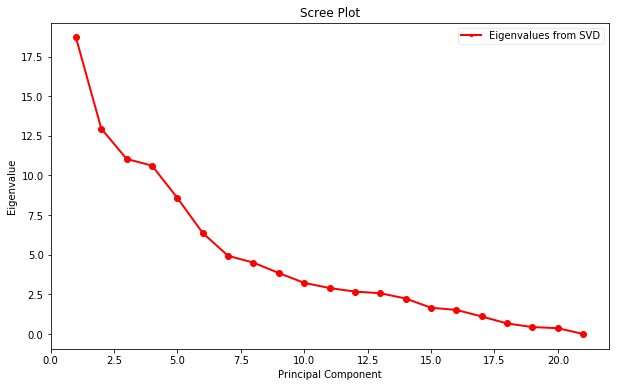

In [18]:
# scree plot for selecting good PCA dim
A = x_scaled[0]  # StandardScaler()
U, S, V = np.linalg.svd(A)
eigvals = S ** 2 / np.cumsum(S)[-1]
eigvals2 = S ** 2 / np.sum(S)
assert (eigvals == eigvals2).all()

fig = plt.figure(figsize=(10, 6))
sing_vals = np.arange(len(eigvals)) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3,
                 shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.savefig('./scree_plot.png')
plt.show()

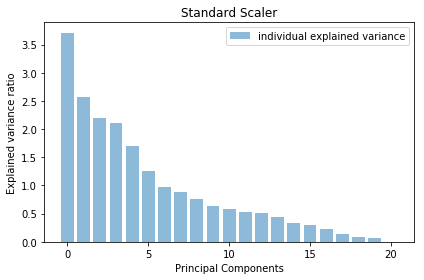

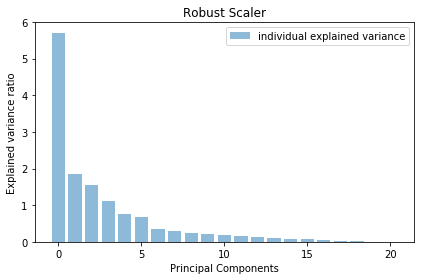

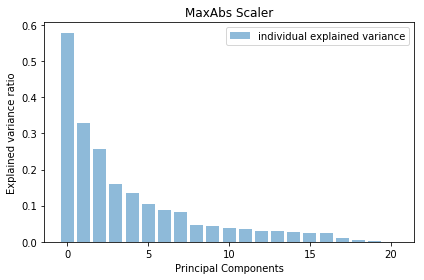

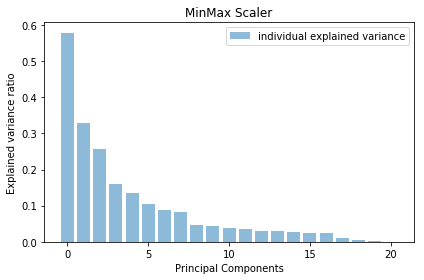

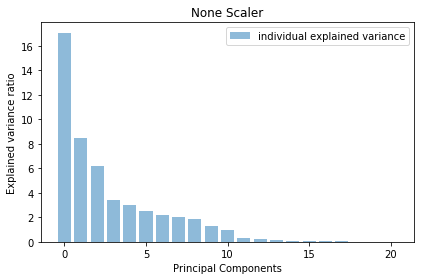

In [19]:
# 1. PCA
for idx, x in enumerate(x_scaled):
    pca = PCA()
    pca.fit_transform(x)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(21), pca.explained_variance_, alpha=0.5,
            align='center', label='individual explained variance')
    
    plt.title('%s Scaler' % (list(scalers.keys())[idx] if not idx == 4 else "None"))
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

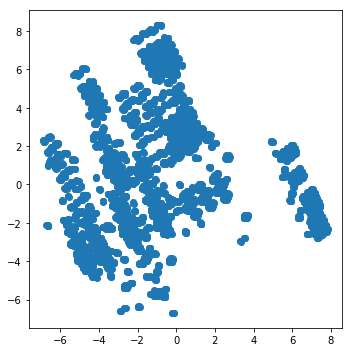

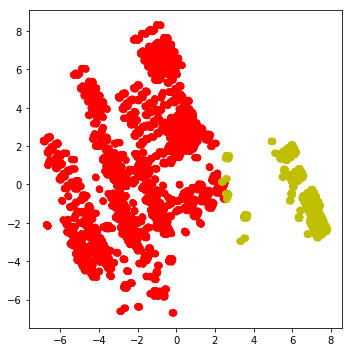

In [20]:
# 1-1. PCA visualize with k-mean cluserting (only 2 features)
pca = PCA(n_components=2)
x = pca.fit_transform(data.values)
plt.figure(figsize=(5, 5))
plt.scatter(x[:,0], x[:,1])  # by class
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
X_clustered = kmeans.fit_predict(data.values)

LABEL_COLOR_MAP = {0 : 'r', 1 : 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

plt.figure(figsize=(5, 5))
plt.scatter(x[:,0], x[:,1], c=label_color)  # by class
plt.tight_layout()
plt.show()


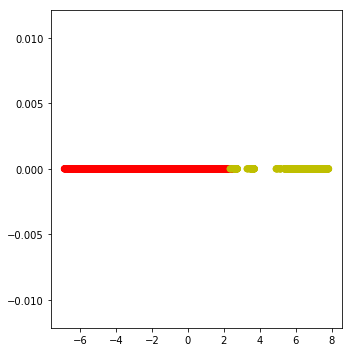

In [21]:
# 1-2. PCA visualize with k-mean cluserting (only 1 features)
kmeans = KMeans(n_clusters=2, random_state=42)
X_clustered = kmeans.fit_predict(data.values)

LABEL_COLOR_MAP = {0 : 'r', 1 : 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

pca = PCA(n_components=2)
x = pca.fit_transform(data.values)
plt.figure(figsize=(5, 5))

xf = x[:,0]
yf = len(xf)*[0]
plt.scatter(xf, yf, c=label_color)
plt.tight_layout()
plt.show()

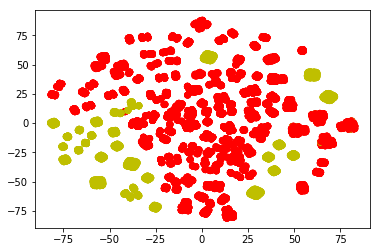

In [22]:
# 2-1. t_SNE visualize
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(data.values)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=label_color)

plt.show()